# Modelo de Clasificación PQR nivel 1. Fuente: web, email

A comparación del otro modelo entrenado, este sólo toma como fuente las PQR de la web y email. 

### Exploración y Preprocesamiento

En esta primera sección se explorará el set de datos y se preprocesarán los textos con los cuales se entrenará el modelo

In [177]:
## importamos las librerias
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
df = pd.read_csv('PQRs_2018-nov2020.csv', sep=';', encoding='utf-8')

C:\Users\juand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,10,11,14,15,18,19,20,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [179]:
df.head(3)

,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,fec_rpta,...,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente,DOCUMENTO
0,PQR_201901_1,verbal,25161887,OFIR DE MARIA CORREA CORREA,CRA 16 18 06,peticion,101202096,8/01/2019,28/01/2019,8/01/2019,...,NaN,3.00981e+09,NaN,HER23L12,D20299,U,Residencial,201901,PQR,NaN
1,PQR_201901_2,verbal,25155655,AURA ALICIA MEJIA CUERVO,CLL 19 15 74,peticion,101249151,4/01/2019,25/01/2019,4/01/2019,...,3.64131e+06,NaN,NaN,HER23L15,D23538,U,Residencial,201901,PQR,NaN
2,PQR_201901_3,verbal,25161763,AMPARO QUICENO GARCIA,CLL 20 15 15 PSO 2,peticion,101274963,16/01/2019,5/02/2019,16/01/2019,...,NaN,3.11739e+09,NaN,HER23L15,D23553,U,Residencial,201901,PQR,NaN


In [180]:
df['forma_requerimiento'].value_counts()

verbal                       575254
telefonico                    57263
escrito                        8530
pagina web                     6238
e-mail                         1607
asesor remoto                   762
chat                            408
otros medios electronicos        92
sspd                             17
interventoria                     3
Name: forma_requerimiento, dtype: int64

In [181]:
df = pd.concat([df[df['forma_requerimiento']=='pagina web'], df[df['forma_requerimiento']=='e-mail']], ignore_index=True)
df.head(3)

,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,fec_rpta,...,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente,DOCUMENTO
0,PQR_201901_1887,pagina web,10082846,DIEGO FRANCO BARCO,BRR MARACAY MNZ B CAS 4,peticion,152991693,28/01/2019,15/02/2019,31/01/2019,...,3.30308e+06,NaN,NaN,CAM23L12,D12071,U,Residencial,201901,PQR,NaN
1,PQR_201901_1912,pagina web,51655066,LUZ MARINA REYES,MNZ 27 CAS 40 CAMPESTRE D,queja,153997234,28/12/2018,21/01/2019,10/01/2019,...,6.88633e+07,3.18304e+09,NaN,CAM23L12,D12032,U,Residencial,201901,PQR,NaN
2,PQR_201901_1936,pagina web,30285814,AMPARO CASTRO OSORIO,DIG 19A 8T 31 CAMPESTRE B,peticion,154952692,4/01/2019,25/01/2019,16/01/2019,...,6.32201e+07,3.14475e+09,NaN,CAM23L12,D12150,U,Residencial,201901,PQR,NaN


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     7845 non-null   object 
 1   forma_requerimiento    7845 non-null   object 
 2   identificacion         7842 non-null   object 
 3   solicitante            7842 non-null   object 
 4   dir_solicitante        7842 non-null   object 
 5   tipo_solicitud         7845 non-null   object 
 6   cuenta                 7845 non-null   int64  
 7   fec_solicitud          7845 non-null   object 
 8   fec_vencmto            7845 non-null   object 
 9   fec_rpta               7845 non-null   object 
 10  clase_inicial          1518 non-null   object 
 11  estrato                7845 non-null   object 
 12  a_favor_de             7845 non-null   object 
 13  tipo_solicitud_1       7845 non-null   object 
 14  documento              1407 non-null   object 
 15  impu

In [183]:
## cantidad total de filas
## 
len(df)

7845

In [184]:
df['tipo_solicitud'] = df['tipo_solicitud'].map(lambda x: 'recurso' if x=='recurso reposicion en subsidio de apelacion' or x=='recurso de reposicion' else x)

In [185]:
df_copy = df.copy()

In [186]:
## Eliminacion de NaN
## 
df_copy['OBSERVACION USUARIO'].isna().value_counts()

False    7164
True      681
Name: OBSERVACION USUARIO, dtype: int64

In [187]:
## Eliminacion de elementos sin sentido
##
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: str(x))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.lower())
len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_copy['OBSERVACION USUARIO'])]

In [188]:
## Eliminacion de elementos sin sentido
## lista con las observaciones que tengan una longitud de observación menor a
## x caracteres.
##
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=20]
index_menor_x = [i for i, o in len_menor_x]

In [189]:
len(index_menor_x)

766

In [190]:
# sorted(len_obs_usuario, key= lambda t: t[1])

In [191]:
## Eliminacion elementos sin sentido
## se procede a eliminarlas
##
df_copy.drop(index_menor_x, inplace=True)

In [192]:
df_copy = df_copy.reset_index(drop=True)
#len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_copy['OBSERVACION USUARIO'])]
#sorted(len_obs_usuario, key= lambda t: t[1])

In [193]:
df_copy['len_obs'] = df_copy['OBSERVACION USUARIO'].map(lambda x: len(x))

In [194]:
df_copy['len_obs'].describe()

count    7079.000000
mean      209.921034
std       155.858657
min        21.000000
25%       100.000000
50%       180.000000
75%       286.000000
max      1000.000000
Name: len_obs, dtype: float64

In [195]:
count = 0
for l in df_copy['len_obs']:
    if l >=500:
        count += 1
print(f"{count} es el numero de observaciones se sobrepasan los 500 caracteres, equivalente a un "
     f"{round(count/len(df_copy), 4)}%")

309 es el numero de observaciones se sobrepasan los 500 caracteres, equivalente a un 0.0437%


In [196]:
## Eliminacion elementos sin sentido
## se guardan las observaciones para ver de que se tratan
##
# len_menor_x_obs = [df_copy['OBSERVACION USUARIO'][i] for i, o in len_menor_x]

In [197]:
## Veamos los tipos de solicitudes nivel 1
##
df_copy['tipo_solicitud'].value_counts()

peticion                           3991
reclamo                            1941
queja                               587
pedidos/proyectos                   278
recurso                             277
programa de financiacion social       5
Name: tipo_solicitud, dtype: int64

In [198]:
## Vamos a depurar estos tipos de solicitudes.
##
df_copy['tipo_solicitud'] = df_copy['tipo_solicitud'].map(lambda x: 'peticion' if x=='programa de financiacion social' or x=='autogestion' else x)

In [199]:
## Validamos el cambio
##
df_copy['tipo_solicitud'].value_counts()

peticion             3996
reclamo              1941
queja                 587
pedidos/proyectos     278
recurso               277
Name: tipo_solicitud, dtype: int64

In [200]:
tipos_solicitud = df_copy['tipo_solicitud'].unique().tolist()
for s in tipos_solicitud:
    print(f"{s}: \n")
    print(df_copy[df_copy['tipo_solicitud']==s][['tipo_solicitud_1']].value_counts())
    print("\n")

peticion: 

tipo_solicitud_1                                            
exencion contribucion                                           1591
informacion general                                              764
cambio de datos basicos                                          413
terminacion del contrato                                         161
gestionar financiacion                                           130
perjuicios por falla en la prestacion del servicio               120
trabajos tecnicos en medidores, transformadores, a               111
cambio datos basicos                                             108
requerimiento competencia de otra empresa                         92
devolucion o traslado de saldo a favor                            67
trabajos tecnicos en med, trafos, acometidas o en infraestr.      58
traslado de deuda                                                 57
emision de documento para pago                                    42
separacion temporal o pago dir

In [201]:
## hay un monton de tipos de solicitudes nivel 2 que realmente son las mismas
## ej: 'revision, mntto, remodelacion o expansion infraestruc. a.p.' ==  'revision, mtto, remodelacion o expansion a.p'
## vamos a estandarizar esto.
##

In [202]:
import Levenshtein as lev

In [203]:
tipo_sol_nv2_p = []
tipo_sol_nv2_r = []
tipo_sol_nv2_pro = []
tipo_sol_nv2_q = []
tipo_sol_nv2_rso = []
for s in tipos_solicitud:
    temp = sorted(df_copy[df_copy['tipo_solicitud']==s]['tipo_solicitud_1'].unique().tolist())
    for i in range(len(temp) - 1):
        a = temp[i]
        b = temp[i+1]
        ratio = lev.ratio(a, b)
        if ratio >= 0.75:
            if s == 'peticion':
                if a not in tipo_sol_nv2_p:
                    tipo_sol_nv2_p.append(a)
            elif s == 'reclamo':
                if a not in tipo_sol_nv2_r:
                    tipo_sol_nv2_r.append(a)
            elif s == 'pedidos/proyectos':
                if a not in tipo_sol_nv2_pro:
                    tipo_sol_nv2_pro.append(a)
            elif s == 'queja':
                if a not in tipo_sol_nv2_q:
                    tipo_sol_nv2_q.append(a)
            else:
                if a not in tipo_sol_nv2_rso:
                    tipo_sol_nv2_rso.append(a)
        else:
            if s == 'peticion':
                if b not in tipo_sol_nv2_p:
                    tipo_sol_nv2_p.append(b)
            elif s == 'reclamo':
                if b not in tipo_sol_nv2_r:
                    tipo_sol_nv2_r.append(b)
            elif s == 'pedidos/proyectos':
                if b not in tipo_sol_nv2_pro:
                    tipo_sol_nv2_pro.append(b)
            elif s == 'queja':
                if b not in tipo_sol_nv2_q:
                    tipo_sol_nv2_q.append(b)
            else:
                if b not in tipo_sol_nv2_rso:
                    tipo_sol_nv2_rso.append(b)

In [204]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='peticion']['tipo_solicitud_1'].unique().tolist()))

46

In [205]:
len(tipo_sol_nv2_p)

41

In [206]:
tipo_sol_nv2_p.append('actualizacion por habeas data')
tipo_sol_nv2_p = sorted(tipo_sol_nv2_p)
tipo_sol_nv2_p

['actualizacion por habeas data',
 'aplicacion beneficio propiedad o venta de activos',
 'cambio datos basicos',
 'cambio de plazo en la financiacion pfs',
 'cambio de uso',
 'condicion especial por solicitud del propietario',
 'dano en equipo electrico',
 'descongelados covid-19',
 'desenergizacion de infraestructura',
 'devolucion o traslado de saldo a favor',
 'devolucion y/o copia de documentos',
 'direccion incorrecta',
 'emision de documento para pago',
 'estado deuda pfs',
 'exencion contribucion',
 'facturacion a la fecha',
 'gestionar financiacion',
 'informacion general',
 'inscripcion, retiro o bloqueo de tarjeta pfs',
 'modificacion de infraestructura por incumplimiento',
 'modificar cobros de terceros',
 'normalizar instalacion',
 'pago de la factura de otro usuario',
 'pago parcial',
 'perjuicios por falla en la prestacion del servicio',
 'poda de arboles',
 'reclamacion extemporanea o agotada la via administ',
 'reconexion',
 'reinstalacion',
 'requerimiento competencia 

In [207]:
tipo_sol_nv2_p.remove('trabajos tecnicos en med, trafos, acometidas o en infraestr.')

In [208]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='reclamo']['tipo_solicitud_1'].unique().tolist()))

23

In [209]:
len(tipo_sol_nv2_r)

18

In [210]:
tipo_sol_nv2_r.append('clase de uso incorrecto')
tipo_sol_nv2_r = sorted(tipo_sol_nv2_r)
tipo_sol_nv2_r

['clase de uso incorrecto',
 'cobro de acuerdo de pago o financiacion',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de otros bienes o servicios en la factura',
 'cobro de revisiones',
 'cobro desconocido',
 'cobro multiple y/o acumulado',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'estrato incorrecto',
 'inconformidad con el aforo',
 'inconformidad con el consumo o produccion factura',
 'inconformidad por cobros por normalizacion del ser',
 'pago sin abono a cuenta',
 'solicitud de rompimiento de solidaridad',
 'subsidios y contribuciones',
 'tarifa incorrecta']

In [211]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='pedidos/proyectos']['tipo_solicitud_1'].unique().tolist()))

16

In [212]:
len(tipo_sol_nv2_pro)

14

In [213]:
tipo_sol_nv2_pro.append('asesoria de proyectos')
tipo_sol_nv2_pro.append('revision de proyectos electricos nivel ii y iii')
tipo_sol_nv2_pro = sorted(tipo_sol_nv2_pro)
tipo_sol_nv2_pro

['asesoria de proyectos',
 'cambio de sistema',
 'cancelacion de provisional',
 'liquidacion de conexos proyectos',
 'portafolio instalaciones sin cotizacion',
 'portafolio trabajos a terceros con cotizacion',
 'provisional a definitivo',
 'retiro de servicios temporales',
 'revision de proyectos electricos nivel i',
 'revision de proyectos electricos nivel ii y iii',
 'solicitud cambio de comercializador (exporta)',
 'solicitud de interventoria',
 'solicitud factibilidad del servicio',
 'solicitud participacion expansion',
 'solicitud viabilidad compra/donacion activos',
 'visita puesta en servicio']

In [214]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='queja']['tipo_solicitud_1'].unique().tolist()))

20

In [215]:
len(tipo_sol_nv2_q)

16

In [216]:
tipo_sol_nv2_q.append('afectacion ambiental')
tipo_sol_nv2_q = sorted(tipo_sol_nv2_q)
tipo_sol_nv2_q

['afectacion ambiental',
 'comportamiento funcionario (trabajador-contra)',
 'demora en atender peticion',
 'demora en reparar dano',
 'entrega inoportuna o no entrega de la factura',
 'falla en la prestacion del servicio por calidad',
 'falla en la prestacion del servicio por continuida',
 'inconformidad con el canal de atencion',
 'inconformidad con la informacion',
 'inconformidad en la atencion de condiciones de seg',
 'inconformidad por la programacion de interrupcione',
 'inconformidad punto de venta y/o recaudo',
 'inconformidad trabajos',
 'inconformidad venta portafolio',
 'incumplimiento revision en las fechas establ',
 'levantamiento de desechos vegetales',
 'suspension o corte del servicio']

In [217]:
len(sorted(df_copy[df_copy['tipo_solicitud']=='recurso']['tipo_solicitud_1'].unique().tolist()))

12

In [218]:
tipo_sol_nv2_rso = sorted(df_copy[df_copy['tipo_solicitud']=='recurso']['tipo_solicitud_1'].unique().tolist())
tipo_sol_nv2_rso

['clase de uso incorrecto',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de otros bienes o servicios en la factura',
 'cobros inoportunos',
 'cobros por promedio',
 'inconformidad con el consumo o produccion facturad',
 'negacion del servicio',
 'otros motivos de recurso',
 'pago sin abono a cuenta',
 'solicitud de rompimiento de solidaridad',
 'subsidios y contribuciones',
 'tarifa incorrecta']

In [219]:
## Los siguientes tipos de solicitudes nivel 1 si tuvieron cambion en los
## niveles 2: peticion, reclamo, pedidos/proyectos, queja
## estos se procederan a estadarizarce.
##
def nv2_replacements(solicitud_nv2):
    s = tipo_sol_nv2_p + tipo_sol_nv2_r + tipo_sol_nv2_pro + tipo_sol_nv2_q + tipo_sol_nv2_rso
    s.remove('revision de proyectos electricos nivel i')
    s.remove('revision de proyectos electricos nivel ii y iii')
    s.remove('falla en la prestacion del servicio por calidad')
    s.remove('falla en la prestacion del servicio por continuida')
    for element in s:
        if lev.ratio(element, solicitud_nv2) >= 0.75:
            solicitud_nv2 = element
        else:
            solicitud_nv2
    return solicitud_nv2

In [220]:
df_copy['tipo_solicitud_1'] = df_copy['tipo_solicitud_1'].map(nv2_replacements)

In [221]:
sorted(df_copy['tipo_solicitud_1'].unique().tolist())

['actualizacion por habeas data',
 'afectacion ambiental',
 'aplicacion beneficio propiedad o venta de activos',
 'cambio datos basicos',
 'cambio de comercializador',
 'cambio de plazo en la financiacion pfs',
 'cambio de sistema',
 'cambio de uso',
 'cancelacion de provisional',
 'clase de uso incorrecto',
 'cobro de acuerdo de pago o financiacion',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de otros bienes o servicios en la factura',
 'cobro de revisiones',
 'cobro desconocido',
 'cobro multiple y/o acumulado',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'comportamiento funcionario (trabajador-contra)',
 'condicion especial por solicitud del propietario',
 'dano en equipo electrico',
 'demora en atender peticion',
 'demora en reparar dano',
 'descongelados covid-19',
 'desenergizacion de infraestructura',
 'devolucion o traslado de saldo a favor',
 'devolucion y/o copia 

In [222]:
df_copy['tipo_solicitud_1'] = df_copy['tipo_solicitud_1'].map(lambda x: 'falla en la prestacion del servicio por continuidad' if x=='falla en la prestacion del servicio por continuida' else x)
df_copy['tipo_solicitud_1'] = df_copy['tipo_solicitud_1'].map(lambda x: 'trabajos tecnicos en med, trafos, acometidas o en infraestr.' if x=='trabajos tecnicos en medidores, transformadores, a' else x)

In [223]:
sorted(df_copy['tipo_solicitud_1'].unique().tolist())

['actualizacion por habeas data',
 'afectacion ambiental',
 'aplicacion beneficio propiedad o venta de activos',
 'cambio datos basicos',
 'cambio de comercializador',
 'cambio de plazo en la financiacion pfs',
 'cambio de sistema',
 'cambio de uso',
 'cancelacion de provisional',
 'clase de uso incorrecto',
 'cobro de acuerdo de pago o financiacion',
 'cobro de cargos relacionados con el servicio publi',
 'cobro de otros bienes o servicios en la factura',
 'cobro de revisiones',
 'cobro desconocido',
 'cobro multiple y/o acumulado',
 'cobro por recuperacion de consumos',
 'cobros inoportunos',
 'cobros por conexion, reconexion, reinstalacion',
 'cobros por promedio',
 'comportamiento funcionario (trabajador-contra)',
 'condicion especial por solicitud del propietario',
 'dano en equipo electrico',
 'demora en atender peticion',
 'demora en reparar dano',
 'descongelados covid-19',
 'desenergizacion de infraestructura',
 'devolucion o traslado de saldo a favor',
 'devolucion y/o copia 

In [224]:
## los resultados de estos cambios
##
print(f"Se pasó de tener {len(df['tipo_solicitud_1'].unique())} solicitudes nivel 2 a {len(df_copy['tipo_solicitud_1'].unique())}")

Se pasó de tener 113 solicitudes nivel 2 a 92


In [225]:
## normalización de los textos.
##
import re
import spacy
import nltk
nltk.download('stopwords')
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.collocations import *
from spellchecker import SpellChecker
nlp = spacy.load('es_core_news_md')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [226]:
def text_normalization(text):
    stop_words = list(stopwords.words('spanish'))  
    no_value_words = ['fecha', 'valor']
    for w in no_value_words:
        stop_words.append(w)
    text = str(text)
    text = text.lower()
    text = ' '.join(re.findall(r'[a-záéíóúñ]{3,}', text))
    
    text = word_tokenize(text)
    for w in stop_words:
        while w in text: text.remove(w)
#    text = ' '.join(list(dict.fromkeys(text)))
    
#    doc = nlp(text)
#    lemas = [t.lemma_ for t in doc]
    
    return' '.join(list(dict.fromkeys(text)))

In [227]:
df_copy['OBSERVACION USUARIO']

0       rad - 20190220001010 - señores chec , en el ba...
1       rad - 20180220021035  - no he logrado pagar po...
2       20190220000106 - hechos yo amparo castro osori...
3            rad -+ 20190220000876 - duplicado de factura
4       20180220021062 - buenas tardes, solicito infor...
                              ...                        
7074    renovatio trading americas s.a.s e.s.p.relacio...
7075    renovatio trading americas s.a.s e.s.p.relacio...
7076    usuario solicita cambio de provisional a defin...
7077    usuario solicita cambio sistema de monofásico ...
7078    se requieren medidores tni que los aporta la e...
Name: OBSERVACION USUARIO, Length: 7079, dtype: object

In [228]:
text = text_normalization(df_copy['OBSERVACION USUARIO'][485])
text

'virtud artículo constitucional solicito realizar visita inspección medidor luz indicado pues cada día cobro servicio público aumenta singular vivo sola salgo mañana llego noche fines semana tampoco aun así llega factura cobros superiores cien pesos necesito saber explicación'

In [230]:
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(text_normalization)
df_copy['OBSERVACION USUARIO']

0       rad señores chec barrio maracay alumbrado públ...
1       rad logrado pagar medio pse favor confirmar pa...
2       hechos amparo castro osorio adquirí computador...
3                                   rad duplicado factura
4       buenas tardes solicito información acerca sigu...
                              ...                        
7074    renovatio trading americas relaciona cuenta el...
7075    renovatio trading americas relaciona cuenta el...
7076    usuario solicita cambio provisional definitivo...
7077    usuario solicita cambio sistema monofásico bif...
7078    requieren medidores tni aporta empresa cobros ...
Name: OBSERVACION USUARIO, Length: 7079, dtype: object

In [231]:
## despues de la normalizacion se volvera a buscar textos sin
## sentido
##
len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_copy['OBSERVACION USUARIO'])]
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=20]
index_menor_x = [i for i, o in len_menor_x]
len(len_menor_x)

28

In [232]:
df_copy.drop(index_menor_x, inplace=True)

In [233]:
## hay que resetear los indices de nuevo.
df_copy = df_copy.reset_index(drop=True)

In [234]:
## Remocion de los bi-gramas frecuentes sin valor semantico.

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

tokens = []
for o in df_copy['OBSERVACION USUARIO']:
    for token in word_tokenize(o):
        tokens.append(token)
        
finder = BigramCollocationFinder.from_words(tokens)
finder.nbest(bigram_measures.likelihood_ratio, 20)

[('exención', 'contribución'),
 ('buenas', 'tardes'),
 ('exoneración', 'contribución'),
 ('industriales', 'decreto'),
 ('continuidad', 'exención'),
 ('muchas', 'gracias'),
 ('cordial', 'saludo'),
 ('anexa', 'listado'),
 ('servicios', 'públicos'),
 ('rut', 'actualizado'),
 ('contribución', 'energía'),
 ('energía', 'industriales'),
 ('buenos', 'días'),
 ('solicitud', 'continuidad'),
 ('trata', 'comunicar'),
 ('falla', 'suministro'),
 ('antena', 'claro'),
 ('continuidad', 'beneficio'),
 ('comunicar', 'linea'),
 ('chec', 'anexa')]

In [235]:
## solo se identifican estos un bi-gramaa que no generan valor:
##
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('buena tarde', ''))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('mucho gracia', ''))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('buen día', ''))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('cordial saludo', ''))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('abril mayo', ''))  

In [236]:
## Se eliminan espacios dobles
##
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.replace('  ', ' '))
df_copy['OBSERVACION USUARIO'] = df_copy['OBSERVACION USUARIO'].map(lambda x: x.strip())

In [237]:
## en lineas generales los textos han quedado así
df_copy['OBSERVACION USUARIO']

0       rad señores chec barrio maracay alumbrado públ...
1       rad logrado pagar medio pse favor confirmar pa...
2       hechos amparo castro osorio adquirí computador...
3                                   rad duplicado factura
4       buenas tardes solicito información acerca sigu...
                              ...                        
7046    renovatio trading americas relaciona cuenta el...
7047    renovatio trading americas relaciona cuenta el...
7048    usuario solicita cambio provisional definitivo...
7049    usuario solicita cambio sistema monofásico bif...
7050    requieren medidores tni aporta empresa cobros ...
Name: OBSERVACION USUARIO, Length: 7051, dtype: object

In [238]:
df_copy.head(3)

,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,fec_rpta,...,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente,DOCUMENTO,len_obs
0,PQR_201901_1887,pagina web,10082846,DIEGO FRANCO BARCO,BRR MARACAY MNZ B CAS 4,peticion,152991693,28/01/2019,15/02/2019,31/01/2019,...,NaN,NaN,CAM23L12,D12071,U,Residencial,201901,PQR,NaN,400
1,PQR_201901_1912,pagina web,51655066,LUZ MARINA REYES,MNZ 27 CAS 40 CAMPESTRE D,queja,153997234,28/12/2018,21/01/2019,10/01/2019,...,3.18304e+09,NaN,CAM23L12,D12032,U,Residencial,201901,PQR,NaN,145
2,PQR_201901_1936,pagina web,30285814,AMPARO CASTRO OSORIO,DIG 19A 8T 31 CAMPESTRE B,peticion,154952692,4/01/2019,25/01/2019,16/01/2019,...,3.14475e+09,NaN,CAM23L12,D12150,U,Residencial,201901,PQR,NaN,342


In [239]:
df_copy['tipo_solicitud'].value_counts()

peticion             3980
reclamo              1932
queja                 586
recurso               277
pedidos/proyectos     276
Name: tipo_solicitud, dtype: int64

In [240]:
## ----- A partir de aquí nos centraremos en equilibrar los tipos de solicitudes -----
## la idea acá es balancear un poco la cantidad de registros entre categorias
## las peticiones hay que reducirlas lo máximo posible podemos quedar al menos con
## unas 1,500 al igual que los reclamos tener unos 1,500. Por el lado de los recursos
## se ensayará creando unos registros sintéticos con LSTM.

In [241]:
datos = df_copy[['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]

In [242]:
datos['tipo_solicitud'].value_counts()

peticion             3980
reclamo              1932
queja                 586
recurso               277
pedidos/proyectos     276
Name: tipo_solicitud, dtype: int64

In [243]:
## Exploremos las peticiones y miremos como hacemos para depurarlas

In [244]:
datos_peticiones = datos[datos['tipo_solicitud']=='peticion'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_peticiones.head(3)

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO
0,peticion,requerimiento competencia de otra empresa,rad señores chec barrio maracay alumbrado públ...
2,peticion,informacion general,hechos amparo castro osorio adquirí computador...
3,peticion,emision de documento para pago,rad duplicado factura


In [245]:
datos_peticiones['tipo_solicitud_1'].value_counts()    

exencion contribucion                                           1588
informacion general                                              763
cambio datos basicos                                             518
trabajos tecnicos en med, trafos, acometidas o en infraestr.     168
terminacion del contrato                                         161
gestionar financiacion                                           127
perjuicios por falla en la prestacion del servicio               120
requerimiento competencia de otra empresa                         92
devolucion o traslado de saldo a favor                            66
traslado de deuda                                                 57
emision de documento para pago                                    41
separacion temporal o pago dirigido                               33
requerimientos sspd o sic                                         29
cambio de uso                                                     27
poda de arboles                   

In [246]:
peticiones_depurar = ['exencion contribucion',
                     'informacion general',
                     'cambio datos basicos']

In [247]:
import random

for p in peticiones_depurar:
    temp = datos_peticiones[datos_peticiones['tipo_solicitud_1']==p]
    indexes = temp.index
    index_sample = random.sample(list(indexes), len(temp)-200)
    datos_peticiones.drop(index_sample, inplace=True)

In [248]:
datos_peticiones['tipo_solicitud_1'].value_counts()

cambio datos basicos                                            200
exencion contribucion                                           200
informacion general                                             200
trabajos tecnicos en med, trafos, acometidas o en infraestr.    168
terminacion del contrato                                        161
gestionar financiacion                                          127
perjuicios por falla en la prestacion del servicio              120
requerimiento competencia de otra empresa                        92
devolucion o traslado de saldo a favor                           66
traslado de deuda                                                57
emision de documento para pago                                   41
separacion temporal o pago dirigido                              33
requerimientos sspd o sic                                        29
cambio de uso                                                    27
poda de arboles                                 

In [249]:
len(datos_peticiones)

1711

In [250]:
## Exploremos los reclamos y miremos como hacemos para depurarlas

In [251]:
datos_reclamo = datos[datos['tipo_solicitud']=='reclamo'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_reclamo.head(3)

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO
5,reclamo,inconformidad con el consumo o produccion fact...,factura cobrndo concepto chec suma deseamos sa...
6,reclamo,"cobros por conexion, reconexion, reinstalacion",legal colombia cobro reconexion liquidado
23,reclamo,inconformidad con el consumo o produccion fact...,regularmente paga factura energía ahora llegó ...


In [252]:
datos_reclamo['tipo_solicitud_1'].value_counts()

inconformidad con el consumo o produccion facturad    1622
cobro de cargos relacionados con el servicio publi      92
pago sin abono a cuenta                                 75
cobros por promedio                                     25
subsidios y contribuciones                              22
cobros por conexion, reconexion, reinstalacion          19
cobro de otros bienes o servicios en la factura         15
estrato incorrecto                                      13
cobro multiple y/o acumulado                            10
tarifa incorrecta                                        7
cobro de acuerdo de pago o financiacion                  6
solicitud de rompimiento de solidaridad                  5
clase de uso incorrecto                                  5
inconformidad por cobros por normalizacion del ser       4
cobro desconocido                                        4
cobro por recuperacion de consumos                       3
inconformidad con la informacion                        

In [253]:
temp = datos_reclamo[datos_reclamo['tipo_solicitud_1']=='inconformidad con el consumo o produccion facturad']
indexes = temp.index
index_sample = random.sample(list(indexes), len(temp)-1200)
datos_reclamo.drop(index_sample, inplace=True)

In [254]:
datos_reclamo['tipo_solicitud_1'].value_counts()

inconformidad con el consumo o produccion facturad    1200
cobro de cargos relacionados con el servicio publi      92
pago sin abono a cuenta                                 75
cobros por promedio                                     25
subsidios y contribuciones                              22
cobros por conexion, reconexion, reinstalacion          19
cobro de otros bienes o servicios en la factura         15
estrato incorrecto                                      13
cobro multiple y/o acumulado                            10
tarifa incorrecta                                        7
cobro de acuerdo de pago o financiacion                  6
solicitud de rompimiento de solidaridad                  5
clase de uso incorrecto                                  5
inconformidad por cobros por normalizacion del ser       4
cobro desconocido                                        4
cobro por recuperacion de consumos                       3
inconformidad con la informacion                        

In [255]:
len(datos_reclamo)

1510

In [256]:
## Ahora sobre los recuros.
## se ensayará creando unos registros sintéticos con LSTM

In [257]:
datos_recurso = datos[datos['tipo_solicitud']=='recurso'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_recurso.head(3)

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO
917,recurso,solicitud de rompimiento de solidaridad,recurrente interpone recurso manifestando inco...
992,recurso,inconformidad con el consumo o produccion fact...,cliente manifista inconformidad respuesta pues...
1011,recurso,inconformidad con el consumo o produccion fact...,cliente manifiesta inconformidad consumo factu...


In [258]:
## vamos a remover la puntuacion y los valores numericos de estas observaciones.
## se dejaran los stopwords.
##
datos_recurso['OBSERVACION USUARIO'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: str(x))
datos_recurso['OBSERVACION USUARIO'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: x.lower())
datos_recurso['OBSERVACION USUARIO'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: ' '.join(re.findall(r'[a-záéíóúñ]{2,}', x)))

In [259]:
datos_recurso['len_obs'] = datos_recurso['OBSERVACION USUARIO'].map(lambda x: len(x))
datos_recurso['len_obs'].describe()

count    277.000000
mean     213.386282
std      148.211850
min       22.000000
25%       95.000000
50%      169.000000
75%      275.000000
max      636.000000
Name: len_obs, dtype: float64

In [260]:
## Se eliminan los recursos con len < 50
##
datos_recurso = datos_recurso.reset_index(drop=True)
len_obs_usuario = [(i, len(o)) for i, o in enumerate(datos_recurso['OBSERVACION USUARIO'])]
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=50]
index_menor_x = [i for i, o in len_menor_x]

In [261]:
datos_recurso.drop(index_menor_x, inplace=True)

In [262]:
datos_recurso['len_obs'].describe()

count    266.000000
mean     220.575188
std      146.861364
min       51.000000
25%      111.250000
50%      171.500000
75%      290.000000
max      636.000000
Name: len_obs, dtype: float64

In [263]:
## vamos a crear un nuevo df con todos los df depurados. 
##
datos_pedidos = datos[datos['tipo_solicitud']=='pedidos/proyectos'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]
datos_quejas = datos[datos['tipo_solicitud']=='queja'][['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO']]

In [264]:
datos_md = pd.concat([datos_peticiones, datos_reclamo, datos_recurso, datos_pedidos, datos_quejas],
                    names=['tipo_solicitud', 'tipo_solicitud_1', 'OBSERVACION USUARIO'],
                    ignore_index=True)

In [265]:
datos_md

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO,len_obs
0,peticion,requerimiento competencia de otra empresa,rad señores chec barrio maracay alumbrado públ...,NaN
1,peticion,emision de documento para pago,rad duplicado factura,NaN
2,peticion,emision de documento para pago,rad llego ultima factura cambio medidor pago,NaN
3,peticion,requerimiento competencia de otra empresa,ultima factura llego cobro alumbrado publico e...,NaN
4,peticion,dano en equipo electrico,dia diciembre corte energia quemo televisor ma...,NaN
...,...,...,...,...
4344,queja,inconformidad con el canal de atencion,solicitud traslado competencias sspd radicado ...,NaN
4345,queja,entrega inoportuna o no entrega de la factura,bnas noches dirijo ustedes predio ubicado call...,NaN
4346,queja,falla en la prestacion del servicio por contin...,solicitud traslado competencias sspd radicado ...,NaN
4347,queja,inconformidad con el canal de atencion,solicitud traslado sspd radicado trata comunic...,NaN


In [266]:
## el data frame con el se ensayará el nuevo modelo luce entonces así
##
datos_md['tipo_solicitud'].value_counts()

peticion             1711
reclamo              1510
queja                 586
pedidos/proyectos     276
recurso               266
Name: tipo_solicitud, dtype: int64

In [294]:
'''datos_md.to_csv('PQR_modelo_web_email.csv',
                sep=',',
                header=datos_md.columns,
                index=False)'''

Hasta acá se trabajó en el parte de exploración y preprocesamiento. Como resume, se trabajará con los siguientes registros:
- peticion             1711
- reclamo              1510
- queja                 586
- pedidos/proyectos     276
- recurso               266

### Entranamiento del modelo

En esta sección se entrenará una máquina de soporte vectorial con kernel lineal y un factor C= 10. La división de los datos se hace de forma aleatoria y estratificada. La extracción de caracteristicas se hizo con TF-IDF. Se añade al pipeline una reducción de dimensiones con SVD

* Uso de LSA para reducción de dimensiones

In [267]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import lsimodel

In [268]:
term_matrix = TfidfVectorizer().fit_transform(datos_md['OBSERVACION USUARIO']) # se saca la matriz TF-IDF
num_ft = term_matrix.shape[0] # numero de términos

In [269]:
num_ft

4349

In [270]:
from numpy.linalg import matrix_rank
m_rank = matrix_rank(term_matrix)

<__array_function__ internals>:5: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


In [271]:
# lsimodel.Projection(num_ft, m_rank, docs=term_matrix)

El kernel colapsa corriendo esto, creo que para la projección se necesita una matriz cuadrada, después tal vez si se podría hacer la projección en un espacio menor de la matriz TF-IDF

In [272]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

x = datos_md['OBSERVACION USUARIO']
y = datos_md['tipo_solicitud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2022021, stratify=y)

text_clf = Pipeline([('tfidf', TfidfVectorizer(max_df=0.95, min_df=2)),
                     ('svd', TruncatedSVD(n_components=200)),
                     ('svm', LinearSVC(C=10, random_state=1022021, max_iter=7000))])
#peticion_clf = Pipeline([('tfidf', TfidfVectorizer()), ('scl', preprocessing.StandardScaler(with_mean=False)),
#                         ('svm', SVC(C=10, kernel='rbf', random_state=10022021, max_iter=2000))])

train_acc = text_clf.fit(x_train, y_train).score(x_train, y_train)
print(f"El accuracy en entrenamiento es de {round(train_acc, 3)}")

El accuracy en entrenamiento es de 0.872


In [273]:
from sklearn import metrics

predictions = text_clf.predict(x_test)
test_acc = metrics.accuracy_score(y_test, predictions)

print(f"El accuracy en validación es de {round(test_acc, 3)} (dif: {round((train_acc-test_acc)*100, 2)}%)")

El accuracy en validación es de 0.797 (dif: 7.56%)


In [274]:
print(metrics.classification_report(y_test, predictions))

                   precision    recall  f1-score   support

pedidos/proyectos       0.81      0.59      0.68        91
         peticion       0.78      0.85      0.81       565
            queja       0.83      0.65      0.73       193
          reclamo       0.82      0.87      0.84       499
          recurso       0.72      0.57      0.64        88

         accuracy                           0.80      1436
        macro avg       0.79      0.71      0.74      1436
     weighted avg       0.80      0.80      0.79      1436



Las clases están muy desbalanceadas , sin embargo si intentamos nivelarlas creo que ya quedan muy pocas y sria complejo entrenar el modelo con esa cantidad de registros. veo una vía:
- buscar métodos de clasificación de texto con sets de datos reducidos

Precisión del clasificador: 79.67 

Matriz de Confusión: 
 [[ 54  33   4   0   0]
 [  9 482  18  50   6]
 [  3  45 125  16   4]
 [  1  53   3 433   9]
 [  0   7   0  31  50]]


<AxesSubplot:>

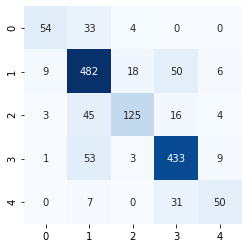

In [275]:
import seaborn as sns

#Calculamos la precisión y mostramos la matriz de confusión
acc = metrics.accuracy_score(y_test, predictions)
mat = metrics.confusion_matrix(y_test, predictions)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)

#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

In [276]:
## Validación cruzada.
#
from sklearn import model_selection
x_train_tfidf = TfidfVectorizer(max_df=0.95, min_df=2).fit_transform(x_train)

x_train_tfidf = TruncatedSVD(n_components=200).fit_transform(x_train_tfidf)

kfold = model_selection.StratifiedKFold(n_splits=10)
score = model_selection.cross_val_score(LinearSVC(C=10, random_state=1022021, max_iter=7000), x_train_tfidf, y_train, cv=kfold, scoring='accuracy')
#score = model_selection.cross_val_score(SVC(C=10, kernel='rbf', random_state=10022021, max_iter=5000), x_train_tfidf, y_train, cv=kfold, scoring='accuracy')
print(f"Accuracy: {round(score.mean()*100, 2)} (+/-{round(score.std()*100, 2)})")

Accuracy: 81.43 (+/-2.19)


In [277]:
## Desde acá se explorarán las curvas ROC y el AUC para cada tipo de solicitud.
##
M = TfidfVectorizer().fit_transform(datos_md['OBSERVACION USUARIO'])
M.shape

(4349, 9191)

In [278]:
tipo_sol_int = []
for t in datos_md['tipo_solicitud']:
    if t == 'peticion':
        tipo_sol_int.append(0)
    elif t == 'queja':
        tipo_sol_int.append(1)
    elif t == 'reclamo':
        tipo_sol_int.append(2)
    elif t == 'pedidos/proyectos':
        tipo_sol_int.append(3)
    else:
        tipo_sol_int.append(4)
datos_md['tipo_sol_int'] = tipo_sol_int

In [279]:
datos_md['tipo_sol_int'] = tipo_sol_int

In [280]:
datos_md

,tipo_solicitud,tipo_solicitud_1,OBSERVACION USUARIO,len_obs,tipo_sol_int
0,peticion,requerimiento competencia de otra empresa,rad señores chec barrio maracay alumbrado públ...,NaN,0
1,peticion,emision de documento para pago,rad duplicado factura,NaN,0
2,peticion,emision de documento para pago,rad llego ultima factura cambio medidor pago,NaN,0
3,peticion,requerimiento competencia de otra empresa,ultima factura llego cobro alumbrado publico e...,NaN,0
4,peticion,dano en equipo electrico,dia diciembre corte energia quemo televisor ma...,NaN,0
...,...,...,...,...,...
4344,queja,inconformidad con el canal de atencion,solicitud traslado competencias sspd radicado ...,NaN,1
4345,queja,entrega inoportuna o no entrega de la factura,bnas noches dirijo ustedes predio ubicado call...,NaN,1
4346,queja,falla en la prestacion del servicio por contin...,solicitud traslado competencias sspd radicado ...,NaN,1
4347,queja,inconformidad con el canal de atencion,solicitud traslado sspd radicado trata comunic...,NaN,1


In [281]:
from sklearn.preprocessing import label_binarize

label_binarize(datos_md['tipo_sol_int'], classes=[0,1,2,3,4])

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Average precision score, micro-averaged over all classes: 0.86


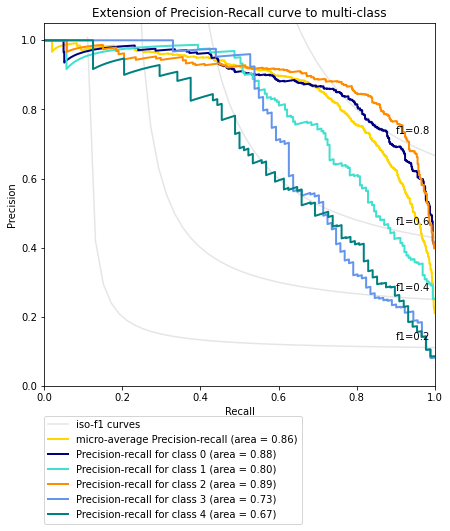

In [282]:
## Curva PR y F1
## La curva PR (precission-recall) es una opción apta para evaluar rendimiento de clasificadores
## donde las clases estan desbalanceadas. esta medida nos pernite observar la relacion entre
## la precision del clasificador y su sensibilidad.
##
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

x = TfidfVectorizer(max_df=0.95, min_df=2).fit_transform(datos_md['OBSERVACION USUARIO'])
x = TruncatedSVD(n_components=100).fit_transform(x)

y = label_binarize(datos_md['tipo_sol_int'], classes=[0,1,2,3,4])
n_classes = 5

# shuffle and split training and test sets
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.33, random_state=0, stratify=y)

# ROC y AUC solo sirven en espacios de clasificacion binarios, por esta razon se 
# entrena un clasificador binario uno vs todos
clf = OneVsRestClassifier(LinearSVC(C=10, random_state=1022021, max_iter=7000))
#clf = OneVsRestClassifier(SVC(C=10, kernel='rbf', random_state=10022021, max_iter=5000))
y_score = clf.fit(x_train, y_train).decision_function(x_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=10))


plt.show()

In [283]:
## Ensayo Peticion
text_ensayo = text_normalization('quiero que me envien una copia de la factura al correo electronico')
text_ensayo

'quiero envien copia factura correo electronico'

In [284]:
text_clf.predict([text_ensayo])

array(['peticion'], dtype=object)

In [285]:
## Ensayo Reclamo
text_ensayo = text_normalization('por que los cobros de la luz se han incrementado tanto en el ultimo mes')
text_ensayo

'cobros luz incrementado ultimo mes'

In [286]:
text_clf.predict([text_ensayo])

array(['reclamo'], dtype=object)

In [287]:
## Ensayo Pedidos/Proyectos
text_ensayo = text_normalization('quisiera que removieran el poste de luz que hay al lado de mi casa ya que construiré una segunda planta y este obstruye la obra')
text_ensayo

'quisiera removieran poste luz lado casa construiré segunda planta obstruye obra'

In [288]:
text_clf.predict([text_ensayo])

array(['peticion'], dtype=object)

In [289]:
## Ensayo Queja
text_ensayo = text_normalization('Tengo una inconformidad respecto al servicio, la luz se va muchas veces al mes')
text_ensayo

'inconformidad respecto servicio luz muchas veces mes'

In [290]:
text_clf.predict([text_ensayo])

array(['queja'], dtype=object)

In [291]:
## Ensayo Recurso
text_ensayo = text_normalization('no me encuentro de acuerdo con la respuesta al reclamo quiero poner un recurso de reposición')
text_ensayo

'encuentro acuerdo respuesta reclamo quiero poner recurso reposición'

In [292]:
text_clf.predict([text_ensayo])

array(['recurso'], dtype=object)

In [293]:
## vamos a guardar el modelo que se entrenó
##
'''import pickle
pickle.dump(text_clf, open('LinearSCV_PQR_web_email.sav', 'wb'))'''